In [2]:
# IMPORTING PACKAGES

import pandas as pd # data processing
import numpy as np # working with arrays
import matplotlib.pyplot as plt # visualization
import seaborn as sb # visualization
from termcolor import colored as cl # text customization
import warnings                                 
warnings.filterwarnings('ignore')


In [3]:
#df = pd.read_csv("")
#df.set_index('Id', inplace = True) # We set the Id col as the index column
#df.head(5) 

In [3]:
# EDA
# Checking if there're nulls
df.isnull().sum() / df.shape[0]*100
#df.dropna(inplace = True)

LotArea        0.000000
MasVnrArea     0.547945
BsmtUnfSF      0.000000
TotalBsmtSF    0.000000
1stFlrSF       0.000000
2ndFlrSF       0.000000
GrLivArea      0.000000
GarageArea     0.000000
WoodDeckSF     0.000000
OpenPorchSF    0.000000
SalePrice      0.000000
dtype: float64

In [4]:
df.describe()

,LotArea,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice
count,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,103.685262,567.240411,1057.429452,1162.626712,346.992466,1515.463699,472.980137,94.244521,46.660274,180921.195890
std,9981.264932,181.066207,441.866955,438.705324,386.587738,436.528436,525.480383,213.804841,125.338794,66.256028,79442.502883
min,1300.000000,0.000000,0.000000,0.000000,334.000000,0.000000,334.000000,0.000000,0.000000,0.000000,34900.000000
25%,7553.500000,0.000000,223.000000,795.750000,882.000000,0.000000,1129.500000,334.500000,0.000000,0.000000,129975.000000
50%,9478.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,1464.000000,480.000000,0.000000,25.000000,163000.000000
75%,11601.500000,166.000000,808.000000,1298.250000,1391.250000,728.000000,1776.750000,576.000000,168.000000,68.000000,214000.000000
max,215245.000000,1600.000000,2336.000000,6110.000000,4692.000000,2065.000000,5642.000000,1418.000000,857.000000,547.000000,755000.000000


In [5]:
# Ckeing the nulls and the dtype at once
df = df.dropna(axis = 0)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1452 entries, 1 to 1460
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LotArea      1452 non-null   int64  
 1   MasVnrArea   1452 non-null   float64
 2   BsmtUnfSF    1452 non-null   int64  
 3   TotalBsmtSF  1452 non-null   int64  
 4   1stFlrSF     1452 non-null   int64  
 5   2ndFlrSF     1452 non-null   int64  
 6   GrLivArea    1452 non-null   int64  
 7   GarageArea   1452 non-null   int64  
 8   WoodDeckSF   1452 non-null   int64  
 9   OpenPorchSF  1452 non-null   int64  
 10  SalePrice    1452 non-null   int64  
dtypes: float64(1), int64(10)
memory usage: 136.1 KB
None


In [15]:
df['GrLivArea'].value_count()

864     22
1040    14
894     11
1456    10
848     10
        ..
1405     1
1402     1
1400     1
3447     1
2054     1
Name: GrLivArea, Length: 858, dtype: int64

In [18]:
df.drop('GrLivArea', axis = 1, inplace = True)

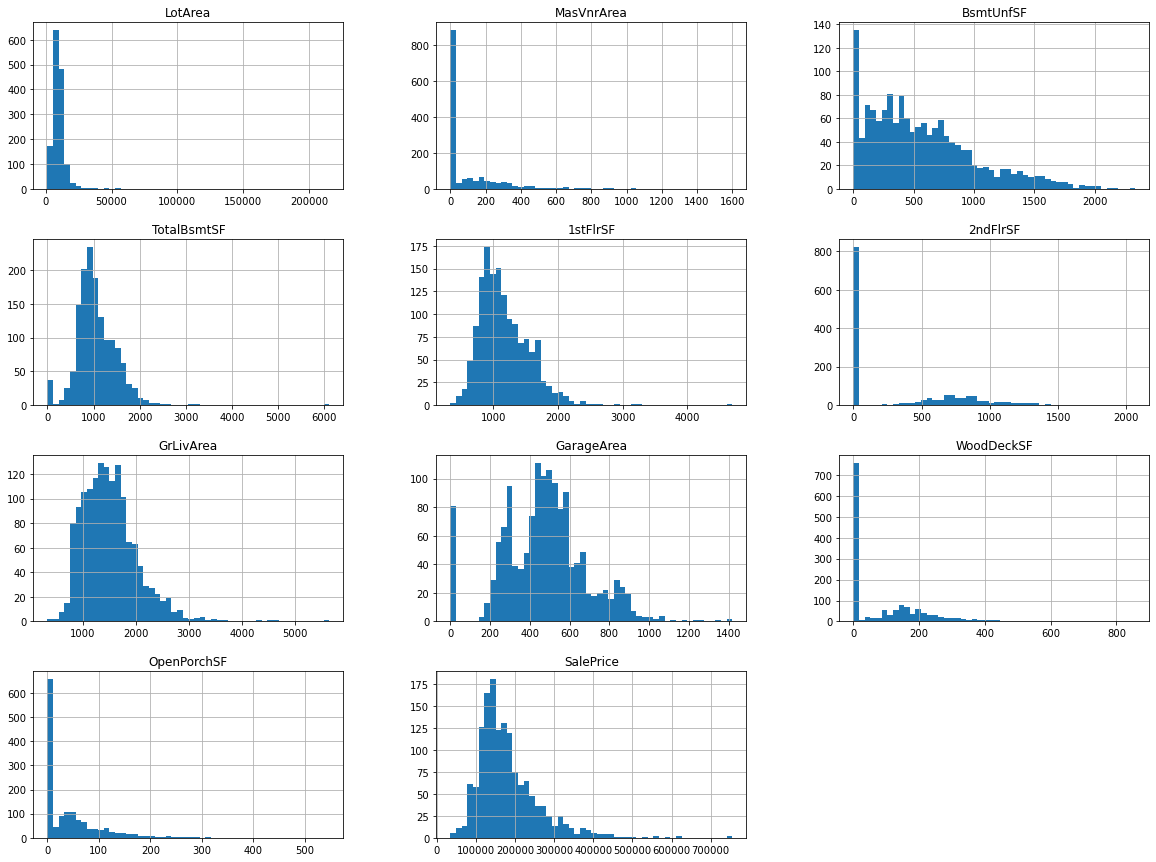

In [6]:

# Let's see the distribution of our columns
df.hist(bins=50, figsize=(20,15))
plt.show()

In [7]:
df.dtypes

LotArea          int64
MasVnrArea     float64
BsmtUnfSF        int64
TotalBsmtSF      int64
1stFlrSF         int64
2ndFlrSF         int64
GrLivArea        int64
GarageArea       int64
WoodDeckSF       int64
OpenPorchSF      int64
SalePrice        int64
dtype: object

From the above output, there's need for normalization

#### Modeling

From the above results we can discover that the some columns have abnormal distribution, which need to be addressed before modelling. 

In [19]:
# Let's the corelation with the target
df.corrwith(df["SalePrice"])
#df.corr().sort_values(ascending=False, by = 'SalePrice')

LotArea        0.264674
MasVnrArea     0.477493
BsmtUnfSF      0.215740
TotalBsmtSF    0.612971
1stFlrSF       0.606849
2ndFlrSF       0.322710
GarageArea     0.622492
WoodDeckSF     0.324650
OpenPorchSF    0.311268
SalePrice      1.000000
dtype: float64

In [27]:
# Identify the important features from the correlation above
imprt_features = df.drop(columns='SalePrice')

In [28]:
# DATA SPLIT
y_var = df['SalePrice'].values #Finding the value of Y


In [29]:
# Modeling 
from sklearn.model_selection import train_test_split # data split

from sklearn.linear_model import LinearRegression # OLS algorithm
from sklearn.linear_model import Ridge # Ridge algorithm
from sklearn.linear_model import Lasso # Lasso algorithm
from sklearn.linear_model import BayesianRidge # Bayesian algorithm
from sklearn.linear_model import ElasticNet # ElasticNet algorithm
from sklearn import svm
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import explained_variance_score as evs # evaluation metric
from sklearn.metrics import r2_score as r2 # evaluation metric
from sklearn.ensemble import RandomForestRegressor


from sklearn.metrics import mean_absolute_error


In [30]:
#Standard scalling our input_columns towards modelling
from sklearn.preprocessing import StandardScaler,MinMaxScaler
x_scaled = MinMaxScaler().fit_transform(imprt_features)

In [31]:
# Modelling part
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y_var, test_size = 0.2, random_state = 0)

In [ ]:
'''# Label Encoding and scalling
# label encode the categorical values and convert them to numbers/strings 
le = LabelEncoder()
le.fit(X_train['GrLivArea'].astype(str))
X_train['GrLivArea'] = le.transform(X_train['GrLivArea'].astype(str))
X_test['GrLivArea'] = le.transform(X_test['GrLivArea'].astype(str)) #

#Standard scalling our input_columns towards modelling
from sklearn.preprocessing import StandardScaler
x_scaled = StandardScaler().fit_transform(imprt_features)'''

In [32]:
# MODELLING


# 1. OLS

ols = LinearRegression()
ols.fit(X_train, y_train)
ols_yhat = ols.predict(X_test)

# 2. Ridge

ridge = Ridge(alpha = 0.5)
ridge.fit(X_train, y_train)
ridge_yhat = ridge.predict(X_test)

# 3. Lasso

lasso = Lasso(alpha = 0.01)
lasso.fit(X_train, y_train)
lasso_yhat = lasso.predict(X_test)

# 4. Bayesian

bayesian = BayesianRidge()
bayesian.fit(X_train, y_train)
bayesian_yhat = bayesian.predict(X_test)

# 5. ElasticNet

en = ElasticNet(alpha = 0.01)
en.fit(X_train, y_train)
en_yhat = en.predict(X_test)


In [36]:
# EVALUATION

# 1. Explained Variance Score

print(cl('EXPLAINED VARIANCE SCORE:', attrs = ['bold']))
print(cl('Explained Variance Score of OLS model is {}'.format(evs(y_test, ols_yhat))))
print(cl('Explained Variance Score of Ridge model is {}'.format(evs(y_test, ridge_yhat))))
print(cl('Explained Variance Score of Lasso model is {}'.format(evs(y_test, lasso_yhat))))
print(cl('Explained Variance Score of Bayesian model is {}'.format(evs(y_test, bayesian_yhat))))
print(cl('Explained Variance Score of ElasticNet is {}'.format(evs(y_test, en_yhat))))

# R-squared

print(cl('R-SQUARED:', attrs = ['bold']))
print(cl('R-Squared of OLS model is {}'.format(r2(y_test, ols_yhat))))
print(cl('R-Squared of Ridge model is {}'.format(r2(y_test, ridge_yhat))))
print(cl('R-Squared of Lasso model is {}'.format(r2(y_test, lasso_yhat))))
print(cl('R-Squared of Bayesian model is {}'.format(r2(y_test, bayesian_yhat))))
print(cl('R-Squared of ElasticNet is {}'.format(r2(y_test, en_yhat))))

EXPLAINED VARIANCE SCORE:
Explained Variance Score of OLS model is 0.773413545393248
Explained Variance Score of Ridge model is 0.7699848361726709
Explained Variance Score of Lasso model is 0.7734127799670799
Explained Variance Score of Bayesian model is 0.7727390564170438
Explained Variance Score of ElasticNet is 0.7311298699202096
R-SQUARED:
R-Squared of OLS model is 0.7724270074145598
R-Squared of Ridge model is 0.7689914499511438
R-Squared of Lasso model is 0.7724262393312514
R-Squared of Bayesian model is 0.7717507804341076
R-Squared of ElasticNet is 0.7299691468118115


In [43]:
# Produce the prediction results from the test results
predicted_prices = ols.predict(X_test)
print(predicted_prices)

[118633.89965592 160251.14581336 217048.94031415 180613.00408905
 241100.34857677 198130.11617513 180401.38295061 157622.4387518
 165472.576965   205025.24492524 193665.61635097 135504.39888179
 235502.3488027  295511.46727152 224551.49242456 457404.84399054
 238634.73089873 144520.12877951 131443.11888866 193798.98036047
 182607.54006175 126409.75485768 171018.53412235 253660.34178532
 133108.89129626 122593.12923149 142080.85722367 211907.29737095
 245535.90711818 285654.77994333 147931.83099305 207269.87323278
 106923.58433216 340502.67606419 133264.29539737  66113.68273763
 152851.79815787 141490.48934838 193370.35248192 129839.93571993
 138729.21661865 249186.59805779 145349.12748507 141816.2381636
 156283.89102845 105147.67703618 102334.40152098 281350.2604117
 125450.75229888 150364.53053602 179096.87473286 300897.6413387
  81703.95082948 117287.37559537 258427.50252559 128235.20806581
 299953.87346934 136019.70721783 269084.00034295 293109.06661383
 179792.00827282 162790.78413

In [45]:
'''
my_submission = pd.DataFrame({'Id': test.Id, 'SalePrice': predicted_prices})
# you could use any filename. We choose submission here
my_submission.to_csv('submission.csv', index=False)'''

"\nmy_submission = pd.DataFrame({'Id': test.Id, 'SalePrice': predicted_prices})\n# you could use any filename. We choose submission here\nmy_submission.to_csv('submission.csv', index=False)"

### Save the model

In [47]:
import pickle 
filename = 'hmodel.pkl'
pickle.dump(ols, open(filename, 'wb'))

In [51]:
# Load the model
my_model_load = pickle.load(open("hmodel.pkl", "rb"))